# Project Week 2

Emiel Steegh   - s1846388  
Freek Nijweide - s1857746

# Project Description

# TODO mention dat we plotly doen niet matplotlib
# TODO write description
# TODO FREEK GRaph Titel
# Math Proof van 3

# Assignment 1

# TODO emiel: kopieer je shit hier

# Assignment 2

# TODO freek: maak dit af
# TODO freek: kopieer je shit hier

## Import and Settings

In [ ]:
# The following includes are needed to work with graphs and display solutions.
from __future__ import division
import networkx as nx
from IPython.core.display import display
%matplotlib inline
import plotly.graph_objects as go

import numpy as np
import pprint
import random

import matplotlib.pyplot as plt
from utils import *
from graphs import *

import plotly.graph_objects as go

import pandas as pd

pp = pprint.PrettyPrinter()

print("imports done")

## General Code Definitions

In [ ]:
#General code definitions
def generate_M_and_v(graph):
    #type: (nx.DiGraph) -> any
    M = nx.to_numpy_matrix(graph) #type: np.matrix
    M.transpose()
    M_T = M.transpose()
    v = list(graph.nodes)
    return M,v

def pagerank(graph,beta): #Made for assignment 4, but needed in assignment 3
    #type: (nx.DiGraph, float) -> any
    M,nodes = generate_M_and_v(graph)
    for i in range(len(nodes)):
        node=nodes[i]
        if graph.out_degree(node) > 0:
            M[i] /= graph.out_degree(node)
    M=M.T # We were working with adjacency matrix. The transition matrix is a transpose of this, where each
    #       number is divided by the out-degree of the node the edge is coming from
    original_v=np.ones(len(M),dtype=float)/len(M)
    v = np.copy(original_v)
    change_was_made = True
    while change_was_made:
        previous_v = np.copy(v)
        first_term = beta* (np.array(np.dot(M,v)).flatten())
        second_term = np.dot((1-beta),original_v)
        v = first_term + second_term
        change_was_made = ((abs(v-previous_v).max() ) > 0.00000000000001) #This 0.00... number was experimentally chosen. Smaller values seemed not to converge, for some graphs 
    
    return v

def wrap_pagerank_in_dict(graph,beta=0.85): #Made for assignment 4, but needed in assignment 3
    values = pagerank(graph,beta)
    keys = list(graph.nodes())
    return dict(zip(keys,values))

def order_nodes_by_rank(nodes, rank):    
    order = np.argsort(rank)[::-1] #sort in degrees in descending order, return indices
    sorted_nodes = [nodes[i] for i in order] #Human readable sorted list of nodes
    ordinal_rank = [list(order).index(i) for i in range(len(order))] # Ordinal rank as specified in exercise
    return sorted_nodes,ordinal_rank

## Graph Definitions

necessary for generating the graphs we will use for testing

In [ ]:
def generate_network(n_count, out_d_count, in_d_count):
    '''
    Generates a network around T (Target) with
    n inaccesible pages for T
    P accessible pages with a link to T
    f supporting pages (link back and forth to T)   
    '''
    
    G = nx.DiGraph()   
   
    for n in range(0, n_count):
        new_node = "n[{}]".format(n)
        G.add_node(new_node)
        
        nodes_in_network = list(G.nodes())
        nodes_in_network.remove(new_node)
        
        current_node_count = len(nodes_in_network)
        
        if current_node_count < out_d_count:
            nodes_out_index = random.sample(range(current_node_count), current_node_count)
        else:
            nodes_out_index = random.sample(range(current_node_count), out_d_count)
        
        if current_node_count < in_d_count:
            nodes_in_index = random.sample(range(current_node_count), current_node_count)
        else:
            nodes_in_index = random.sample(range(current_node_count), in_d_count)
        
        for index in nodes_out_index:
            G.add_edge(new_node, nodes_in_network[index])
            
        for index in nodes_in_index:
            G.add_edge(nodes_in_network[index], new_node)
        
    return G

# Generate a graph we will use in the next exercise
def generate_test_web():
    graph = nx.DiGraph()

    graph.add_edge('Google', 'Bing')
    graph.add_edge('Google', 'Reddit')
    graph.add_edge('Reddit', 'Trap')
    graph.add_edge('Spider','Trap')
    graph.add_edge('Trap','Spider')
    graph.add_edge('Reddit', 'Apple')
    graph.add_edge('Reddit', 'Wikipedia')
    graph.add_edge('Apple', 'Twitter')
    graph.add_edge('Twitter', 'Bing')
    graph.add_edge('Wikipedia', 'Twitter')
    graph.add_edge('Bing', 'Wikipedia')
    graph.add_edge('Apple', 'Wikipedia')
    graph.add_edge('Bing','Google')
    graph.add_edge('Bing','Dead end')
    graph.add_edge('IN node','Apple')
    graph.name = "Big web graph (for testing)"

    return graph

def gen_arrow():
    G = fromDot('''
    strict digraph A {
    A -> B -> C -> D -> E;
    }''')
    G.name = "Arrow graph"
    return nx.DiGraph(G)
    
def gen_inward():
    G = fromDot('''
    strict digraph A {
    {B C D E F G } -> A;
    }''')
    G.name = "Inward graph"
    return nx.DiGraph(G)

def gen_lasso():
    G = fromDot('''
    strict digraph A {
    A -> B -> C -> D -> E -> A;
    A -> E -> D -> C -> B -> A;
    A -> F -> G;
    }''')
    G.name = "Lasso graph"
    return nx.DiGraph(G)

def gen_grid():
    G = fromDot('''
    strict digraph A {
    A -> {B D};
    B -> {C E};
    
    C -> {F};
    D -> {E G};
    E -> {F H};
    F -> {I};
    G -> {H};
    H -> {I};
    I -> {};
    }''')
    G.name = "Grid graph"
    return nx.DiGraph(G)


graphs = [
generate_test_web(),
gen_arrow(),
gen_inward(),
gen_lasso(),
gen_grid()
]

for graph in graphs:
    print graph.name
    display(draw(graph))

# Assignment 3

We will deliver a short mathematical proof for why an increasing r, and an increasing f, would increase the ranking of T.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$n = total\ amount\ of\ nodes$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$F=The\ set\ of\ supporting\ pages$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$T = the\ PageRank\ of\ target\ node\ T$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$r=\beta\cdot \sum_{p} r_p$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$T = r +\sum_{f \in F} (net\ PageRank\ received\ from\ f) $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$ net\ PageRank\ received\ from\ f = (1 - \beta) \cdot \frac{1}{n} \cdot n = 1 - \beta  $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$T = r + (1 - \beta) \cdot f $

Obviously, if r increases, T increases as well. The same holds for f.

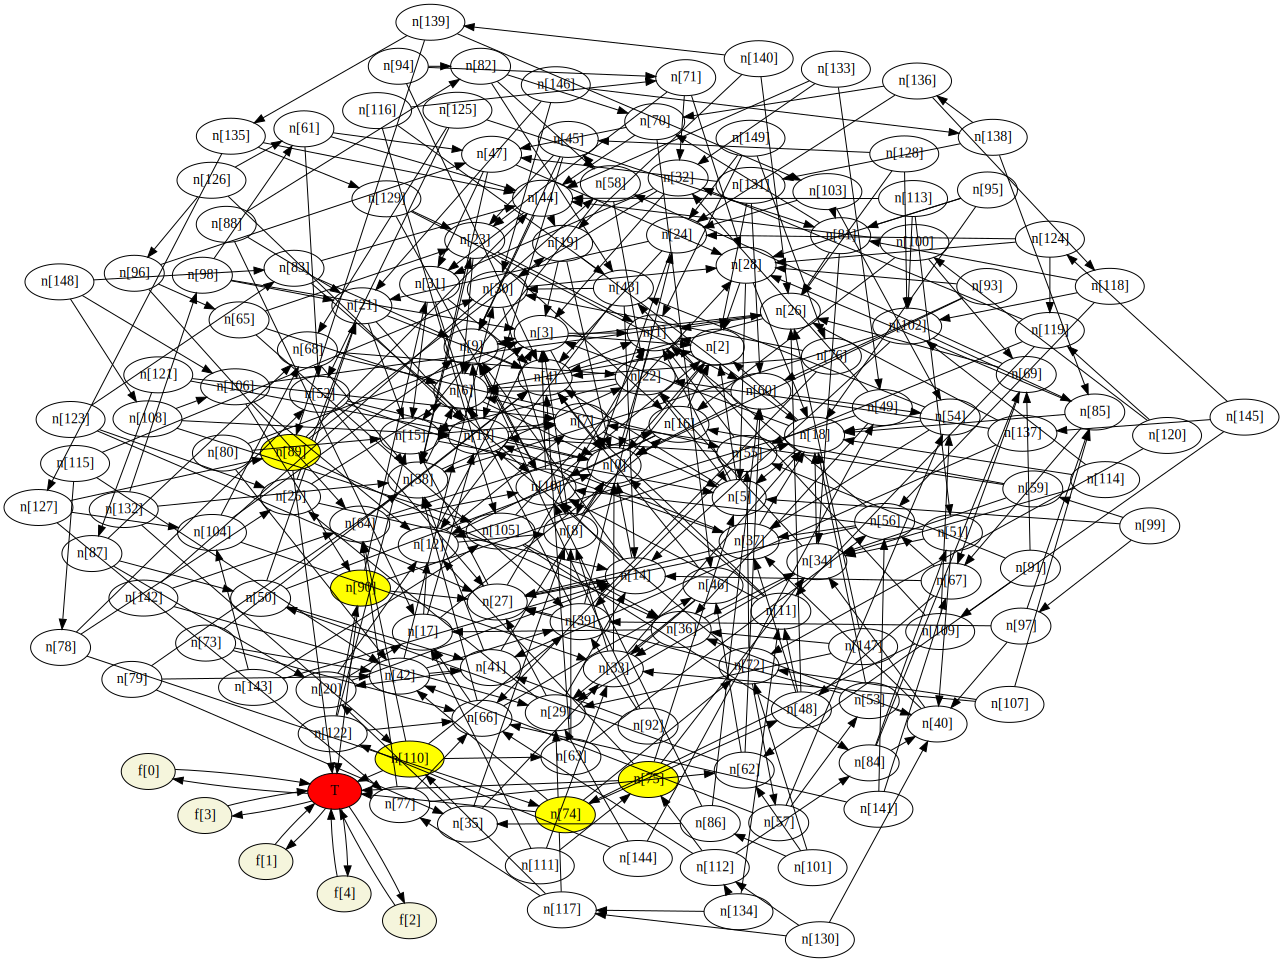

working on P (0/6)
working on P (1/6)
working on P (2/6)
working on P (3/6)
working on P (4/6)
working on P (5/6)
working on P (6/6)


In [55]:
def return_T_rank(G_o, P_count, quality, f_count, ordered_nodes, drawing):
    '''
    Returns the pagerank of T, the percentile of it's pagerank, and the adjusted version thereof (when leaving supporting pages out of it)
    '''
    
    G = G_o.copy() #a duplicate of the graph to work on
    
    nodes_count = len(G.nodes())

    P_T_connections = [] # a list that will conatain the n pages that will become accessible to T 
    
    index = int(round(quality*nodes_count)) #starting point for grabbing web pages
    
    for P in range(P_count): #grab the first page and go decrement to the next lower quality pages
        P_T_connections.append(ordered_nodes[index-P-1])
    
    attrs = {} # a dict for drawing a network with colors to signify interesting nodes
    attrs['T'] = {'style' : 'filled', 'fillcolor' : 'red'}
    
    #add T, this is neccessary to prevent out no T in the network if P = 0 && f = 0
    G.add_node('T')
    
    #connect T to all P
    for P in P_T_connections:
        G.add_edge(P, 'T')
        attrs[P] = {'style' : 'filled', 'fillcolor' : 'yellow'}
    
    #connect T and it's supporting pages
    for f in range(int(f_count)):
        new_f = "f[{}]".format(f)
        G.add_edge('T', new_f)
        G.add_edge(new_f, 'T')
        attrs[new_f] = {'style' : 'filled', 'fillcolor' : '#f5f5dc'}
    
    #draw and use the color attributes only if desired, gives some visual insight into the network but makes many repeat computations very slow
    if drawing:
        nx.set_node_attributes(G, attrs)
        display(draw(G))
    
    #calculate the pagerank - in general definitions, theoretical explanation in assignment 4
    #and calculate the percentile of page T's pagerank
    pr = pagerank(G, 0.85)
    T_pagerank = pr[list(G.nodes).index('T')]
    pagerank_order, ordinal = order_nodes_by_rank(list(G.nodes),pr)
    T_pagerank_index = pagerank_order.index('T')
    reported_percentage = 100 - (T_pagerank_index / len(pr) * 100)
    #the adjusted percentile removes the supporting pages from the equation
    adjusted_percentage = 100 - (T_pagerank_index / (len(pr)-f_count) * 100)
    
    return T_pagerank, reported_percentage, adjusted_percentage

def plot_assignment3_results(ls_data_in, title_in, q_range,):
    '''
    takes a list of 2Darrays to plot them on top of each other, a slider lets you select which array from the list you see
    '''

    #there are three types of plots to be made: pagerank, percentile & adjusted percentile
    #this adjusts the title to the relevant type
    l_title = '{} of T based on f and r'.format(title_in)

    fig = go.Figure()
    
    itter = 0 #for the naming of the traces
    #loop over the array list and plot each as an invisble surface graph
    for data in ls_data_in:
        fig.add_trace(go.Surface(
                        visible=False,
                        name="P {}".format(itter),
                        z=data, y=100*(1-q_range)))
        itter += 1
        
    #add axis labels, title and size here
    fig.update_layout(title=l_title,
                    autosize=True,
                    scene = dict(
                    xaxis_title='ammount of supporting pages',
                    yaxis_title='percentile of pagerank gained from accessible pages',
                    zaxis_title=title_in))
    
    #set something to be visble
    fig.data[0].visible = True
    
    #code for sliders from slider example:
    #      https://plot.ly/python/sliders/
    #thanks! :)
    steps = []
    for i in range(len(fig.data)):
        step = dict(
            method="restyle",
            args=["visible", [False] * len(fig.data)],
        )
        step["args"][1][i] = True  # Toggle i'th trace to "visible"
        steps.append(step)

    sliders = [dict(
        active=10,
        currentvalue={"prefix": "Amount of accessible pages: "},
        pad={"t": 50},
        steps=steps
    )]

    fig.update_layout(
        sliders=sliders
    )
    #end of copied slider code

    fig.show()

def wrapper(Graph, P_range, q_range, f_range):
    '''
    Takes the desired ranges of P q and f to graph and itterates through them all
    The final function that calls the others
    '''
    
    #a bit of user-error prevention, one cannot have more pages P than fit in a step of quality
    nodes_count = len(G.nodes())
    max_P_count = int(nodes_count/len(q_range))
    P_count = max(P_range)
    if P_count > max_P_count:
        print "The number of accessible pages (P) cannot be larger than {} for the current quality range (q)".format(max_P_count)
        return None
    
    #with error prevention out of the way it is time to start
    ranked_nodes = pagerank(G, .85) #calculate the pagerank of the net without T here to save computational time, pass it for every calculation
    ordered_nodes, ordinal_rank = order_nodes_by_rank(list(G.nodes),ranked_nodes)
    
    #lists to be filled wto send to the plotting function
    ls_results_pagerank = []
    ls_results_percentile = []
    ls_results_percentile_adj = []
    
    
    for index_P in range(len(P_range)):
        #this wrapper function takes some time (depending on your machine) so a proof of life might be nice
        print "working on P ({}/{})".format(index_P, int(P_count))         
        
        #declare the zeroed 2D array to store the data in (they need to be filled with something to work, just declaring size wont work)
        results_pagerank = np.zeros([len(q_range),len(f_range)])
        results_percentile = np.zeros([len(q_range),len(f_range)])
        results_percentile_adj = np.zeros([len(q_range),len(f_range)])
        
        #fill the 2D array with appropriate data
        for index_f in range(len(f_range)):
            for index_q in range(len(q_range)):
                f_count = f_range[index_f]
                quality = q_range[index_q]
                T_pagerank, T_percentile, T_percentile_adj = return_T_rank(G, index_P, quality, f_count, ordered_nodes, False)
                
                results_pagerank[index_q][index_f] = T_pagerank
                results_percentile[index_q][index_f] = T_percentile
                results_percentile_adj[index_q][index_f] = T_percentile_adj
        
        #and append the data to its respective list
        ls_results_pagerank.append(results_pagerank)
        ls_results_percentile.append(results_percentile)
        ls_results_percentile_adj.append(results_percentile_adj)
    
    print(done)
    #send it all out to be plotted
    plot_assignment3_results(ls_results_pagerank, "Pagerank", q_range)
    plot_assignment3_results(ls_results_percentile, "Pagerank percentile ",q_range)
    plot_assignment3_results(ls_results_percentile_adj, "Adjusted pagerank percentile",q_range)
    
    #done
    return None

def draw_network(G, P, q, f):
    '''
    quick and fairly dirty code for drawing the graph the code uses, not neccessary but can give some insights
    G staring = graph
    '''
    ranked_nodes = pagerank(G, .85)
    ordered_nodes, ordinal_rank = order_nodes_by_rank(list(G.nodes),ranked_nodes)
    get_rid_of_return_print = return_T_rank(G, P, q, f, ordered_nodes, True)


G = generate_network(150, 3, 0) #create the network without T and f to work on, with 150 n, with up to 3 out per node and 0 in on spawn

P_range = np.linspace(0,6,7) #With 0->6 accessible pages P
q_range = np.linspace(0.1,1,10) #With -> increments of 10% in quality of those P pages
f_range = np.linspace(0,10,11) #with 0->10 supporting pages f

draw_network(G, 5, 0.5, 5) #draws network we work on, with 5 pages P, of quality 50%, and 5 pages f

wrapper(G, P_range, q_range, f_range)

# Assignment 4

There are three different ranking systems discussed in this week's chapters and lectures.
The first is an inDegree-based ranking system. The ranking of a page depends on how many pages link to it.
This system is easily fooled, and dead-end pages receive incredibly high rankings.

The second ranking system discussed is Google's PageRank. This system expands upon the idea of inDegree rankings,
by having a node "spread" its incoming ranking over its outgoing links. This can also include a degree of randomness,
where a node will spread some of its incoming ranking over *all* nods (to avoid spider traps and dead ends).

The third ranking system discussed HITS, based on the hub-authority model. In this model, a page is considered a good hub
if it links to good authorities (pages with good content that people want to see). A page is considered a good
authority if it is linked to by proper hubs. The page's authority ranking is the one actually used in the search.


In [ ]:
#Note: the pagerank functions can be found at the top of the file, as they were needed in assignment 3 already
def generate_indegree_score(graph):    
    in_degrees = []
    for node in graph.nodes:
        if type(graph) == nx.classes.digraph.DiGraph:
            in_degrees.append(graph.in_degree(node))
        else:
            in_degrees.append(graph.degree(node))
    return in_degrees

def ordinal_difference(a, b):
    if type(a) == list:
        a = np.array(a,dtype=float)
    if type(b) == list:
        b = np.array(b,dtype=float)
    return sum(abs(a-b))

def hits(M):
    if type(M) != np.matrix:
        M = nx.adjacency_matrix(M)
    v=np.ones(len(M),dtype=float)
    change_was_made = True
    h=np.copy(v)
    a=np.copy(v)
    while change_was_made:
        #calculate new v for hub and authority
        # M remains unchanged
        previous_a = np.copy(a)
        previous_h = np.copy(h)
        
        a = np.array(np.dot(M.transpose(),h)).flatten()
        a /= a.max()

        h = np.array(np.dot(M,a)).flatten()
        h /= h.max()
        change_was_made = ((abs(a-previous_a).max() ) > 0) or ((abs(h-previous_h).max() ) > 0) 
    
    return a,h

In [50]:
prints = False #turn this to true to enable printing of more info!

graph = generate_test_web()
graphs = [generate_test_web(), gen_lasso(), gen_arrow(),gen_inward(),gen_grid()]
differences=[]
for graph in graphs:
    M,v = generate_M_and_v(graph)
    if prints:
        print graph.name
        print str(v) + "\n"
    
    in_degrees = generate_indegree_score(graph)
    human_readable, indegree_order = order_nodes_by_rank(v, in_degrees)
    if prints:
        print "Solution to in_degree ranking:"
        print "Human readable ranking (nodes sorted by their rank): " + str(human_readable)
        print "Ordinal ranking: " + str(indegree_order) + "\n"

    a , h = hits(M)
    human_readable, hits_order = order_nodes_by_rank(v, a)
    if prints:
        print "Our solution to HITS ranking"
        print "Human readable ranking: " + str(human_readable)
        print "Ordinal ranking: " + str(hits_order) + "\n"

        print "HITS ranking (networkx implementation, for reference)"
    (real_h_dict, real_a_dict) = nx.hits(graph,max_iter=100000)
    
    difference = []
    real_a=[]
    for i in range(len(v)):
        node = v[i]
        real_a.append(real_a_dict[node])
        difference.append(abs(real_a_dict[node]-a[i]))
        
    real_human_readable, real_hits_order = order_nodes_by_rank(v, real_a)
    if prints:
        print "Human readable ranking: " + str(real_human_readable)
        print "Ordinal ranking: " + str(real_hits_order)
        print "Ordinal ranking difference between our implementation and networkx: " + str (ordinal_difference(hits_order,real_hits_order)) + "\n"


    
    page_rank_list = pagerank(graph,0.85)
    human_readable, pagerank_order = order_nodes_by_rank(v, page_rank_list)
    if prints:
        print "Our solution to pagerank"
        print "Human readable ranking: " + str(human_readable)
        print "Ordinal ranking: " + str(pagerank_order) + "\n"
        print "pagerank (networkx implementation, for reference)"
    (real_v_dict) = nx.pagerank(graph,max_iter=100000)
    
    difference = []
    real_v=[]
    for i in range(len(v)):
        node = v[i]
        real_v.append(real_v_dict[node])
        difference.append(abs(real_v_dict[node]-real_v[i]))
        
    real_human_readable, real_pagerank_order = order_nodes_by_rank(v, real_v)
    if prints:
        print "Human readable ranking: " + str(real_human_readable)
        print "Ordinal ranking: " + str(real_pagerank_order)
        print "Ordinal ranking difference between our implementation and networkx: " + str (ordinal_difference(pagerank_order,real_pagerank_order))

    differences.append([ordinal_difference(indegree_order,hits_order),
                        ordinal_difference(indegree_order,pagerank_order),
                        ordinal_difference(hits_order,pagerank_order),
                        ordinal_difference(hits_order,real_hits_order),
                        ordinal_difference(pagerank_order,real_pagerank_order),
                        ])
    if prints:
        print("\n\n\n")


graphs=["Big (n=10) web", "Lasso", "Arrow", "Inward", "Grid"]
indegree_hits_diff = [x[0] for x in differences]
indegree_pagerank_diff = [x[1] for x in differences]
hits_pagerank_diff = [x[2] for x in differences]
hits_ours_vs_networkx_diff = [x[3] for x in differences]
pagerank_ours_vs_networkx_diff = [x[4] for x in differences]

fig = go.Figure(data=[
    go.Bar(name='In-degree vs HITS', x=graphs, y=indegree_hits_diff),
    go.Bar(name='In-degree vs PageRank', x=graphs, y=indegree_pagerank_diff),
    go.Bar(name='HITS vs PageRank', x=graphs, y=hits_pagerank_diff),
    go.Bar(name='Our HITS implementation vs networkx\'', x=graphs, y=hits_ours_vs_networkx_diff),
    go.Bar(name='Our PageRank implementation vs networkx\'', x=graphs, y=pagerank_ours_vs_networkx_diff)  
])

fig.update_layout(title='Difference between ranking algorithms for each graph',
                    autosize=True,
                    yaxis_title='ordinal difference')

# Change the bar mode
fig.update_layout(barmode='group')
fig.show()
    

# TODO explanation
# TODO graph title